<a href="https://colab.research.google.com/github/thor4/crypto/blob/main/constant_product_AMM_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of the Constant Product Formula Uniswap v2 Uses
Assume an ETH price of `$1,600`. It's paired with VST, which is also assumed to be `$1`. WIth these pricing parameters, our initial supply will be `100 ETH / 160,000 VST`.

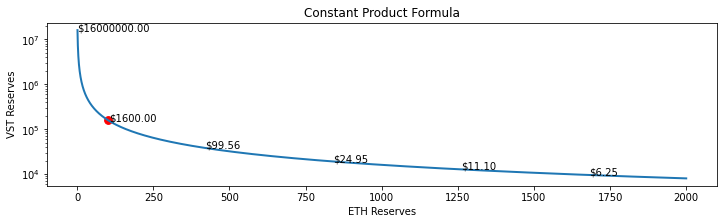

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set initial reserves
x_reserve = 100  # initial reserve of token x (ETH)
y_reserve = 160000  # initial reserve of token y (VST)

# Compute k value
k = x_reserve * y_reserve

# Generate values for token x (ETH) between 1 and 2000
x_values = np.linspace(1, 2000, num=5000)

# Compute corresponding token y (VST) values using the constant product formula
y_values = k / x_values

# Compute ETH price at each x value
eth_prices = y_values / x_values

# Plot the curve using a log scale on the y-axis
fig, ax = plt.subplots(figsize=(12, 3))
ax.set_yscale('log')
ax.plot(x_values, y_values, linewidth=2)

# Highlight the starting price in red
starting_price = y_reserve / x_reserve
ax.scatter(x_reserve, y_reserve, s=60, color='red')

# Annotate the starting price on the plot
ax.annotate(f'${starting_price:.2f}', (x_reserve * 1.05, y_reserve * 0.95))

# Annotate ETH prices at regular intervals along the curve
for i, x in enumerate(x_values[::1000]):
    eth_price = y_values[::1000][i] / x
    ax.annotate(f'${eth_price:.2f}', (x * 1.05, y_values[::1000][i] * 0.95))

# Add labels and title
ax.set_xlabel('ETH Reserves')
ax.set_ylabel('VST Reserves')
ax.set_title('Constant Product Formula')

# Show the plot
plt.show()


The starting price of $1,600 is shown at the red dot in the plot. 

As the ETH reserves get smaller, the VST reserves increase and the price of ETH increases. This movement happens as a result of traders buying ETH out of the pool in exchange for more VST.

Conversely, as the ETH reserves increase, the VST reserves decrease and the price of ETH decreases. This movement happens as a result of traders selling ETH in to the pool in exchange for VST.